In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [4]:
# we convert the data to 2D(numsample , image_dimension) 
#with our images present as 1D vectors
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

# now we normalize our data
X_train = X_train/255
X_test = X_test/255


The current size of our dataset is : 
X_train ->  (60000, 784) 
y_train ->  (60000,) 
X_test ->  (10000, 784) 
y_test (10000,)


In [5]:
# org X_train is taking a lot of time so i am shortening the size
X_test_small,y_test_small = X_test[:30000],y_test[:30000]
X_train_small,y_train_small = X_train[:5000],y_train[:5000]

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_small, y_train_small)
y_pred = model.predict(X_test_small)

original_accuracy = np.sum(y_pred == y_test_small)/ len(y_test_small)
# i am printing less labels for better view
print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test_small[:50]}")
print(f"original_accuracy: {original_accuracy * 100:.2f}%")


Predicted labels: [7 2 1 0 9 1 8 9 4 9 0 6 9 0 1 0 9 7 2 9 9 6 6 8 9 0 7 9 0 1 8 1 8 0 7 0 7
 1 0 1 1 9 9 8 6 8 1 6 9 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
original_accuracy: 58.00%


In [6]:
from sklearn.metrics import classification_report
report = classification_report(y_test[:5000], y_pred[:5000], output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'original_accuracy': original_accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Model': model.__class__.__name__}

{'original_accuracy': np.float64(0.58),
 'Precision': 0.6156403490713452,
 'Recall': 0.5462,
 'F1-Score': 0.5010745175735581,
 'Model': 'GaussianNB'}

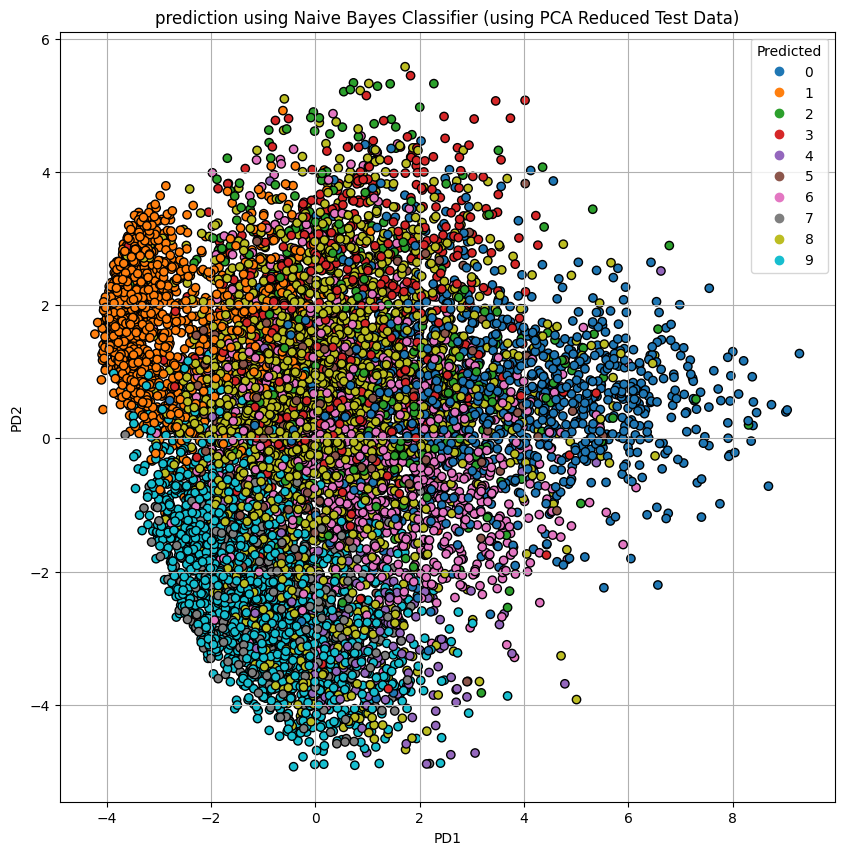

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(),title='Predicted')
plt.title("prediction using Naive Bayes Classifier (using PCA Reduced Test Data)")
plt.xlabel("PD1")
plt.ylabel("PD2")
plt.grid(True)
plt.show()

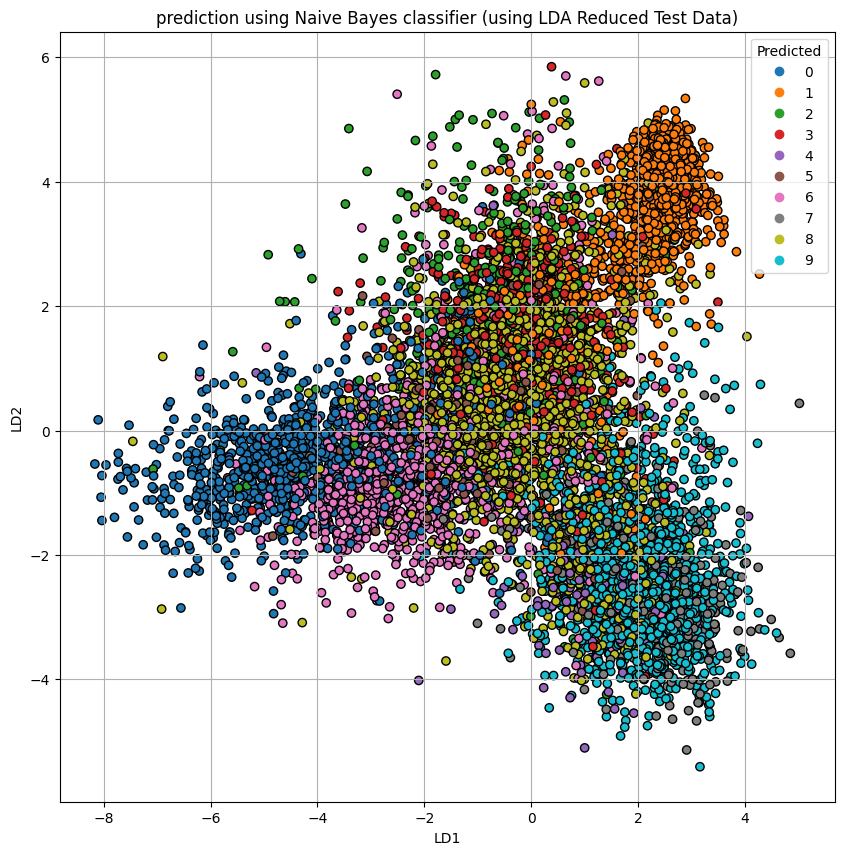

"\nWe observe that the original_accuracy of 62.50% for the Naive Bayes classifier \nis relatively low. This could be due to the assumption of feature \nindependence in Naive Bayes, which doesn't always hold true in practice. \nin our dataset with highly correlated features, such as digits that \nare visually similar or overlap, this assumption leads to poor performance.\nwe can see multiple overlaps here. also the performance is poor compared\nto KNN\n"

In [8]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
Here, we reduced the test data (X_test_small) into 2D using LDA, 
which tries to separate classes based on the true labels (y_test_small).
Then we visualized the predicted labels (y_pred) using colors.
If the same-colored points clauster together, it means the model is 
doing a decent job.
However, we notice overlaps (like between 3,8,2,6), which 
likely confused the model, leading to lower original_accuracy.
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using Naive Bayes classifier"
" (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
We observe that the original_accuracy of 62.50% for the Naive Bayes classifier 
is relatively low. This could be due to the assumption of feature 
independence in Naive Bayes, which doesn't always hold true in practice. 
in our dataset with highly correlated features, such as digits that 
are visually similar or overlap, this assumption leads to poor performance.
we can see multiple overlaps here. also the performance is poor compared
to KNN
'''


c:\Users\anshb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


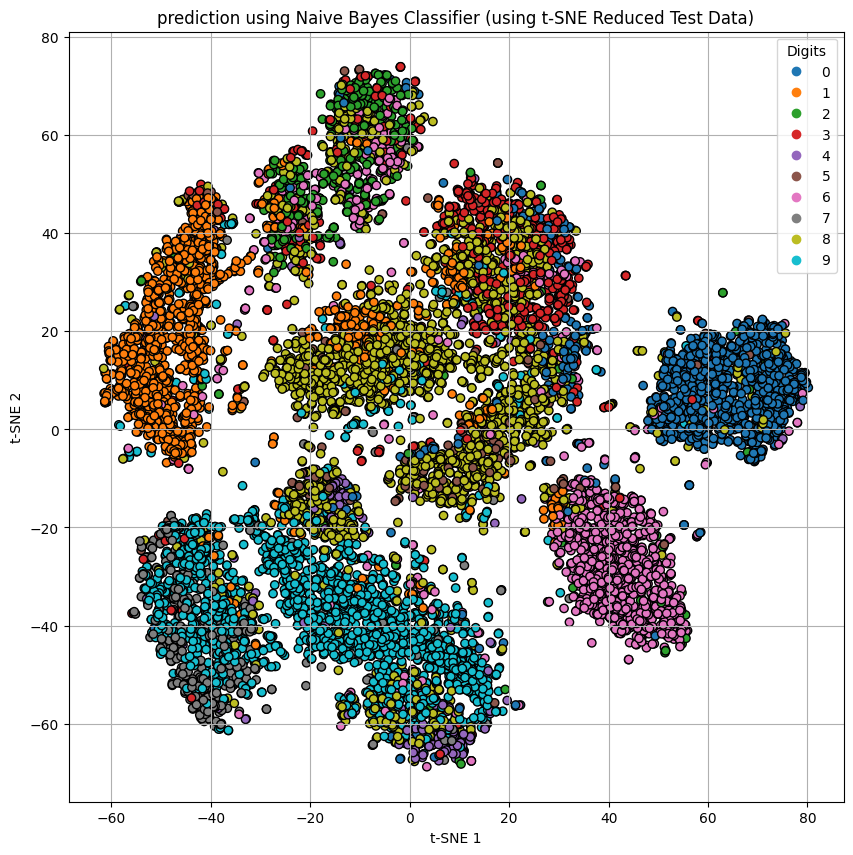

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50,n_iter=1000,n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_test_small)

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("prediction using Naive Bayes Classifier (using t-SNE Reduced Test Data)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

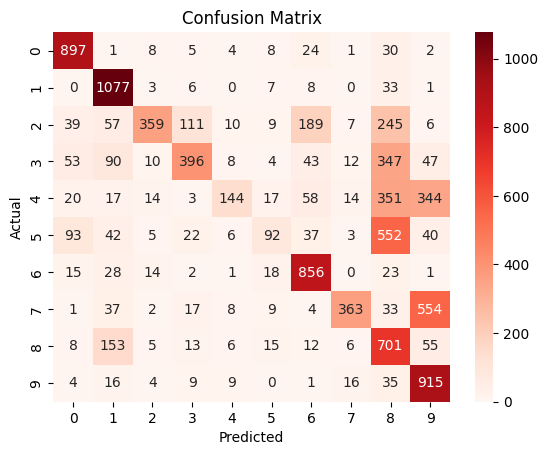

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_small, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

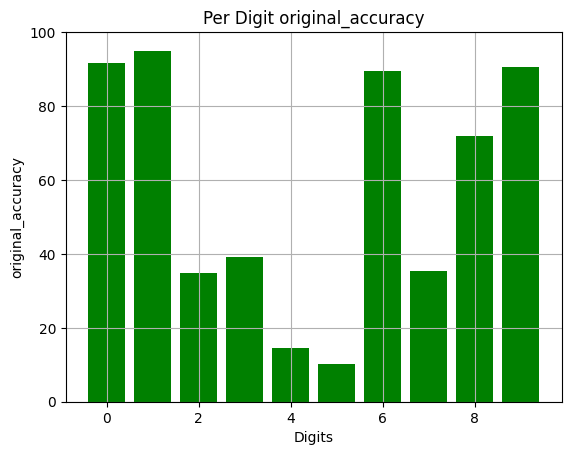

In [11]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test_small == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("original_accuracy")
plt.title("Per Digit original_accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()


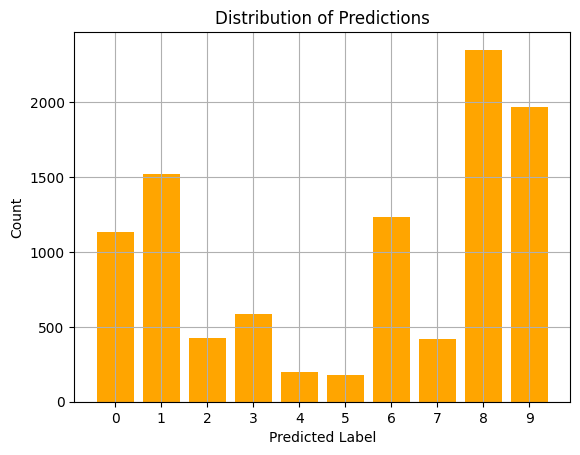

In [12]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()


In [13]:
def rbf_kernel(X, Y, gamma=1e-3):
    XX = np.sum(X**2, axis=1).reshape(-1, 1)
    YY = np.sum(Y**2, axis=1).reshape(1, -1)
    dist = XX + YY - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * dist)

def compute_mmd(X, Y, gamma=1e-3):
    K_xx = rbf_kernel(X, X, gamma)
    K_yy = rbf_kernel(Y, Y, gamma)
    K_xy = rbf_kernel(X, Y, gamma)
    m, n = X.shape[0], Y.shape[0]
    return np.sum(K_xx)/(m**2) + np.sum(K_yy)/(n**2) - 2*np.sum(K_xy)/(m*n)

samples_per_class = 3000
digit_data = {i: X_train[y_train == i][:samples_per_class] for i in range(10)}

mmd_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        mmd_matrix[i, j] = compute_mmd(digit_data[i], digit_data[j])

avg_mmd = np.mean(mmd_matrix, axis=1)
print(f"\nAverage MMD per class: {np.round(avg_mmd, 4)}")

import scipy.special
class_weights = scipy.special.softmax(avg_mmd)


sample_weights = np.array([class_weights[label] for label in y_train_small])

clf_weighted = GaussianNB()
clf_weighted.fit(X_train_small, y_train_small, sample_weight=sample_weights)
y_pred_weighted = clf_weighted.predict(X_test_small)
weighted_accuracy = np.mean(y_pred_weighted == y_test_small)

print(f"\nMMD-Weighted Accuracy: {weighted_accuracy * 100:.2f}%")
print(f"Change in Accuracy: {(weighted_accuracy - original_accuracy) * 100:.2f}%")


Average MMD per class: [0.0589 0.0516 0.0365 0.0379 0.0364 0.0284 0.0412 0.0418 0.0309 0.0329]

MMD-Weighted Accuracy: 58.00%
Change in Accuracy: 0.00%


In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.linalg import fractional_matrix_power

def coral(source, target, regularization=1e-3):
    cov_source = np.cov(source, rowvar=False) + regularization * np.eye(source.shape[1])
    cov_target = np.cov(target, rowvar=False) + regularization * np.eye(target.shape[1])
    cov_source_sqrt = fractional_matrix_power(cov_source, 0.5)
    cov_target_sqrt_inv = fractional_matrix_power(cov_target, -0.5)
    aligned_target = (target - target.mean(axis=0)) @ cov_target_sqrt_inv @ cov_source_sqrt + source.mean(axis=0)
    return aligned_target

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_small)

model = GaussianNB()
model.fit(X_train_pca, y_train_small)

X_test_aligned = coral(X_train_pca, X_test_pca)

y_pred_coral = model.predict(X_test_aligned)
coral_accuracy = accuracy_score(y_test_small, y_pred_coral)
print(f"CORAL-Aligned Accuracy: {coral_accuracy * 100:.2f}%")
print(f"Accuracy change: {(coral_accuracy - original_accuracy) * 100:.2f}%")

CORAL-Aligned Accuracy: 85.95%
Accuracy change: 27.95%
